# RIO-125: Rank Features of a Smartphone - Build a Python Application to Classify and Rank Dataset Batch 01

#### importing all the necessary libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv(r"D:\Norka\intenship-2\Dataset\phone_dataset.csv")

In [3]:
data

brand                 model 2G_bands 3G_bands 4G_bands  weight_g     SIM  \
0     Acer         Iconia Talk S      Yes      Yes      Yes     260.0    Dual   
1     Acer        Liquid Z6 Plus      Yes      Yes      Yes     169.0  Single   
2     Acer             Liquid Z6      Yes      Yes      Yes     190.0  Single   
3     Acer  Iconia Tab 10 A3-A40      N/A       No       No     110.0      No   
4     Acer             Liquid X2      Yes      Yes      Yes     166.0  Triple   
...    ...                   ...      ...      ...      ...       ...     ...   
8626   ZTE                  F600      Yes      Yes       No      90.0    Mini   
8627   ZTE                  F103      Yes      Yes       No      90.0    Mini   
8628   ZTE                  F101      Yes      Yes       No      90.0    Mini   
8629   ZTE                  F100      Yes      Yes       No      90.0    Mini   
8630   ZTE       Coral200 Sollar      Yes       No       No      85.0    Mini   

     display_size(inches)  Pixel_height  Pixel_width  ... RAM(GB)  \
0                       7         720.0         1280  ...     2.0   
1                     5.5        1080.0         1920  ...     3.0   
2                       5         720.0         1280  ...     1.0   
3                    10.1        1920.0          120  ...     2.0   
4                     5.5         720.0         1280  ...     3.0   
...                   ...           ...          ...  ...     ...   
8626                  2.4         240.0          320  ...     0.0   
8627                    2         176.0          220  ...     0.0   
8628                    2         176.0          220  ...     0.0   
8629                    2         176.0          220  ...     0.0   
8630                    1         128.0          128  ...     0.0   

      primary_camera(MP)  secondary_camera(MP)  audio_jack  WIFI  bluetooth  \
0                  13.00                   2.0         Yes   Yes        Yes   
1                  13.00                   5.0         Yes   Yes        Yes   
2                   8.00                   2.0         Yes   Yes        Yes   
3                   5.00                   2.0         Yes   Yes        Yes   
4                  13.00                  13.0         Yes   Yes        Yes   
...                  ...                   ...         ...   ...        ...   
8626                3.15                   1.0          No    No        Yes   
8627                2.00                   1.0          No    No        Yes   
8628                2.00                   1.0          No    No        Yes   
8629                2.00                   1.0          No    No        Yes   
8630                0.00                   0.0          No    No         No   

      GPS radio Battery(Mah) Aprox Price INR  
0     Yes   Yes         3400           13600  
1     Yes   Yes         4080           20000  
2     Yes   Yes          145            9600  
3      No    No         1000           18400  
4     Yes   Yes         4020           18400  
...   ...   ...          ...             ...  
8626   No   Yes          800            4266  
8627   No   Yes         1000            5333  
8628   No   Yes         1000            5333  
8629   No   Yes         1000            5333  
8630   No    No          690            3680  

[8631 rows x 23 columns]

In [4]:
data.head()

brand                 model 2G_bands 3G_bands 4G_bands  weight_g     SIM  \
0  Acer         Iconia Talk S      Yes      Yes      Yes     260.0    Dual   
1  Acer        Liquid Z6 Plus      Yes      Yes      Yes     169.0  Single   
2  Acer             Liquid Z6      Yes      Yes      Yes     190.0  Single   
3  Acer  Iconia Tab 10 A3-A40      N/A       No       No     110.0      No   
4  Acer             Liquid X2      Yes      Yes      Yes     166.0  Triple   

  display_size(inches)  Pixel_height  Pixel_width  ... RAM(GB)  \
0                    7         720.0         1280  ...     2.0   
1                  5.5        1080.0         1920  ...     3.0   
2                    5         720.0         1280  ...     1.0   
3                 10.1        1920.0          120  ...     2.0   
4                  5.5         720.0         1280  ...     3.0   

   primary_camera(MP)  secondary_camera(MP)  audio_jack  WIFI  bluetooth  GPS  \
0                13.0                   2.0         Yes   Yes        Yes  Yes   
1                13.0                   5.0         Yes   Yes        Yes  Yes   
2                 8.0                   2.0         Yes   Yes        Yes  Yes   
3                 5.0                   2.0         Yes   Yes        Yes   No   
4                13.0                  13.0         Yes   Yes        Yes  Yes   

  radio Battery(Mah) Aprox Price INR  
0   Yes         3400           13600  
1   Yes         4080           20000  
2   Yes          145            9600  
3    No         1000           18400  
4   Yes         4020           18400  

[5 rows x 23 columns]

In [5]:
data.shape

(8631, 23)

In [6]:
data.describe()

weight_g  Pixel_height  Pixel_width    CPU(core)  \
count  8631.000000   8631.000000  8631.000000  8631.000000   
mean    137.255561    424.843033   658.990384     2.248639   
std      90.404437    340.637469   574.851907     2.017261   
min       2.000000      1.000000     1.000000     1.000000   
25%      95.000000    176.000000   220.000000     1.000000   
50%     112.000000    320.000000   400.000000     1.000000   
75%     147.000000    540.000000   960.000000     4.000000   
max    2005.000000   3840.000000  3840.000000    10.000000   

       internal_memory(GB)      RAM(GB)  primary_camera(MP)  \
count          8631.000000  8631.000000         8631.000000   
mean             12.651177    21.618063            4.388273   
std              18.059369    85.689665            7.792104   
min               0.000000     0.000000            0.000000   
25%               1.000000     0.000000            1.000000   
50%               4.000000     1.000000            3.150000   
75%              16.000000     2.000000            5.000000   
max              96.000000   768.000000          600.000000   

       secondary_camera(MP)  Battery(Mah)  Aprox Price INR  
count           8631.000000   8631.000000     8.631000e+03  
mean               1.335147   1475.939868     1.201890e+04  
std                2.327645   1292.704105     3.572122e+04  
min                0.000000     15.000000     6.130000e+02  
25%                0.000000    780.000000     4.800000e+03  
50%                0.000000   1000.000000     8.000000e+03  
75%                1.300000   1925.000000     1.360000e+04  
max               20.000000  11560.000000     2.160000e+06

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8631 entries, 0 to 8630
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   brand                 8631 non-null   object 
 1   model                 8631 non-null   object 
 2   2G_bands              8631 non-null   object 
 3   3G_bands              8631 non-null   object 
 4   4G_bands              8631 non-null   object 
 5   weight_g              8631 non-null   float64
 6   SIM                   8631 non-null   object 
 7   display_size(inches)  7418 non-null   object 
 8   Pixel_height          8631 non-null   float64
 9   Pixel_width           8631 non-null   int64  
 10  OS                    8631 non-null   object 
 11  CPU(core)             8631 non-null   int64  
 12  internal_memory(GB)   8631 non-null   float64
 13  RAM(GB)               8631 non-null   float64
 14  primary_camera(MP)    8631 non-null   float64
 15  secondary_camera(MP) 

In [8]:
data.dtypes

brand                    object
model                    object
2G_bands                 object
3G_bands                 object
4G_bands                 object
weight_g                float64
SIM                      object
display_size(inches)     object
Pixel_height            float64
Pixel_width               int64
OS                       object
CPU(core)                 int64
internal_memory(GB)     float64
RAM(GB)                 float64
primary_camera(MP)      float64
secondary_camera(MP)    float64
audio_jack               object
WIFI                     object
bluetooth                object
GPS                      object
radio                    object
Battery(Mah)              int64
Aprox Price INR           int64
dtype: object

In [9]:
data.nunique()

brand                    108
model                   8273
2G_bands                   3
3G_bands                   2
4G_bands                   2
weight_g                 890
SIM                       12
display_size(inches)     186
Pixel_height              79
Pixel_width              109
OS                        42
CPU(core)                  6
internal_memory(GB)      132
RAM(GB)                   34
primary_camera(MP)        49
secondary_camera(MP)      26
audio_jack                 3
WIFI                       2
bluetooth                  2
GPS                        2
radio                      2
Battery(Mah)             369
Aprox Price INR          294
dtype: int64

In [10]:
data.isnull()

brand  model  2G_bands  3G_bands  4G_bands  weight_g    SIM  \
0     False  False     False     False     False     False  False   
1     False  False     False     False     False     False  False   
2     False  False     False     False     False     False  False   
3     False  False     False     False     False     False  False   
4     False  False     False     False     False     False  False   
...     ...    ...       ...       ...       ...       ...    ...   
8626  False  False     False     False     False     False  False   
8627  False  False     False     False     False     False  False   
8628  False  False     False     False     False     False  False   
8629  False  False     False     False     False     False  False   
8630  False  False     False     False     False     False  False   

      display_size(inches)  Pixel_height  Pixel_width  ...  RAM(GB)  \
0                    False         False        False  ...    False   
1                    False         False        False  ...    False   
2                    False         False        False  ...    False   
3                    False         False        False  ...    False   
4                    False         False        False  ...    False   
...                    ...           ...          ...  ...      ...   
8626                 False         False        False  ...    False   
8627                 False         False        False  ...    False   
8628                 False         False        False  ...    False   
8629                 False         False        False  ...    False   
8630                 False         False        False  ...    False   

      primary_camera(MP)  secondary_camera(MP)  audio_jack   WIFI  bluetooth  \
0                  False                 False       False  False      False   
1                  False                 False       False  False      False   
2                  False                 False       False  False      False   
3                  False                 False       False  False      False   
4                  False                 False       False  False      False   
...                  ...                   ...         ...    ...        ...   
8626               False                 False       False  False      False   
8627               False                 False       False  False      False   
8628               False                 False       False  False      False   
8629               False                 False       False  False      False   
8630               False                 False       False  False      False   

        GPS  radio  Battery(Mah)  Aprox Price INR  
0     False  False         False            False  
1     False  False         False            False  
2     False  False         False            False  
3     False  False         False            False  
4     False  False         False            False  
...     ...    ...           ...              ...  
8626  False  False         False            False  
8627  False  False         False            False  
8628  False  False         False            False  
8629  False  False         False            False  
8630  False  False         False            False  

[8631 rows x 23 columns]

In [11]:
data.isnull().sum()

brand                      0
model                      0
2G_bands                   0
3G_bands                   0
4G_bands                   0
weight_g                   0
SIM                        0
display_size(inches)    1213
Pixel_height               0
Pixel_width                0
OS                         0
CPU(core)                  0
internal_memory(GB)        0
RAM(GB)                    0
primary_camera(MP)         0
secondary_camera(MP)       0
audio_jack                 0
WIFI                       0
bluetooth                  0
GPS                        0
radio                      0
Battery(Mah)               0
Aprox Price INR            0
dtype: int64

In [12]:
data=data.dropna()

In [13]:
data.shape

(7418, 23)

In [14]:
data[['brand','model','2G_bands','3G_bands','weight_g','SIM','display_size(inches)','Pixel_height','Pixel_width','OS','CPU(core)','internal_memory(GB)','RAM(GB)','primary_camera(MP)','secondary_camera(MP)','audio_jack','WIFI','bluetooth','GPS','radio','Battery(Mah)','Aprox Price INR']]= data[['brand','model','2G_bands','3G_bands','weight_g','SIM','display_size(inches)','Pixel_height','Pixel_width','OS','CPU(core)','internal_memory(GB)','RAM(GB)','primary_camera(MP)','secondary_camera(MP)','audio_jack','WIFI','bluetooth','GPS','radio','Battery(Mah)','Aprox Price INR']].replace(0,np.NaN)     

C:\Users\91799\anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [15]:
data.isnull().sum()

brand                      0
model                      0
2G_bands                   0
3G_bands                   0
4G_bands                   0
weight_g                   0
SIM                        0
display_size(inches)       0
Pixel_height               0
Pixel_width                0
OS                         0
CPU(core)                  0
internal_memory(GB)     1044
RAM(GB)                 2774
primary_camera(MP)       506
secondary_camera(MP)    3311
audio_jack                 0
WIFI                       0
bluetooth                  0
GPS                        0
radio                      0
Battery(Mah)               0
Aprox Price INR            0
dtype: int64

In [16]:
data['internal_memory(GB)'].fillna(data['internal_memory(GB)'].mean(),inplace=True)
data['primary_camera(MP)'].fillna(data['primary_camera(MP)'].mean(),inplace=True)
data['secondary_camera(MP)'].fillna(data['secondary_camera(MP)'].mean(),inplace=True)
data['RAM(GB)'].fillna(data['RAM(GB)'].mean(),inplace=True)

C:\Users\91799\anaconda3\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [17]:
data.isnull().sum()

brand                   0
model                   0
2G_bands                0
3G_bands                0
4G_bands                0
weight_g                0
SIM                     0
display_size(inches)    0
Pixel_height            0
Pixel_width             0
OS                      0
CPU(core)               0
internal_memory(GB)     0
RAM(GB)                 0
primary_camera(MP)      0
secondary_camera(MP)    0
audio_jack              0
WIFI                    0
bluetooth               0
GPS                     0
radio                   0
Battery(Mah)            0
Aprox Price INR         0
dtype: int64

In [18]:
data.shape

(7418, 23)

### Exploratory Data Analysis

array([[<AxesSubplot:title={'center':'weight_g'}>,
        <AxesSubplot:title={'center':'Pixel_height'}>,
        <AxesSubplot:title={'center':'Pixel_width'}>],
       [<AxesSubplot:title={'center':'CPU(core)'}>,
        <AxesSubplot:title={'center':'internal_memory(GB)'}>,
        <AxesSubplot:title={'center':'RAM(GB)'}>],
       [<AxesSubplot:title={'center':'primary_camera(MP)'}>,
        <AxesSubplot:title={'center':'secondary_camera(MP)'}>,
        <AxesSubplot:title={'center':'Battery(Mah)'}>],
       [<AxesSubplot:title={'center':'Aprox Price INR'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

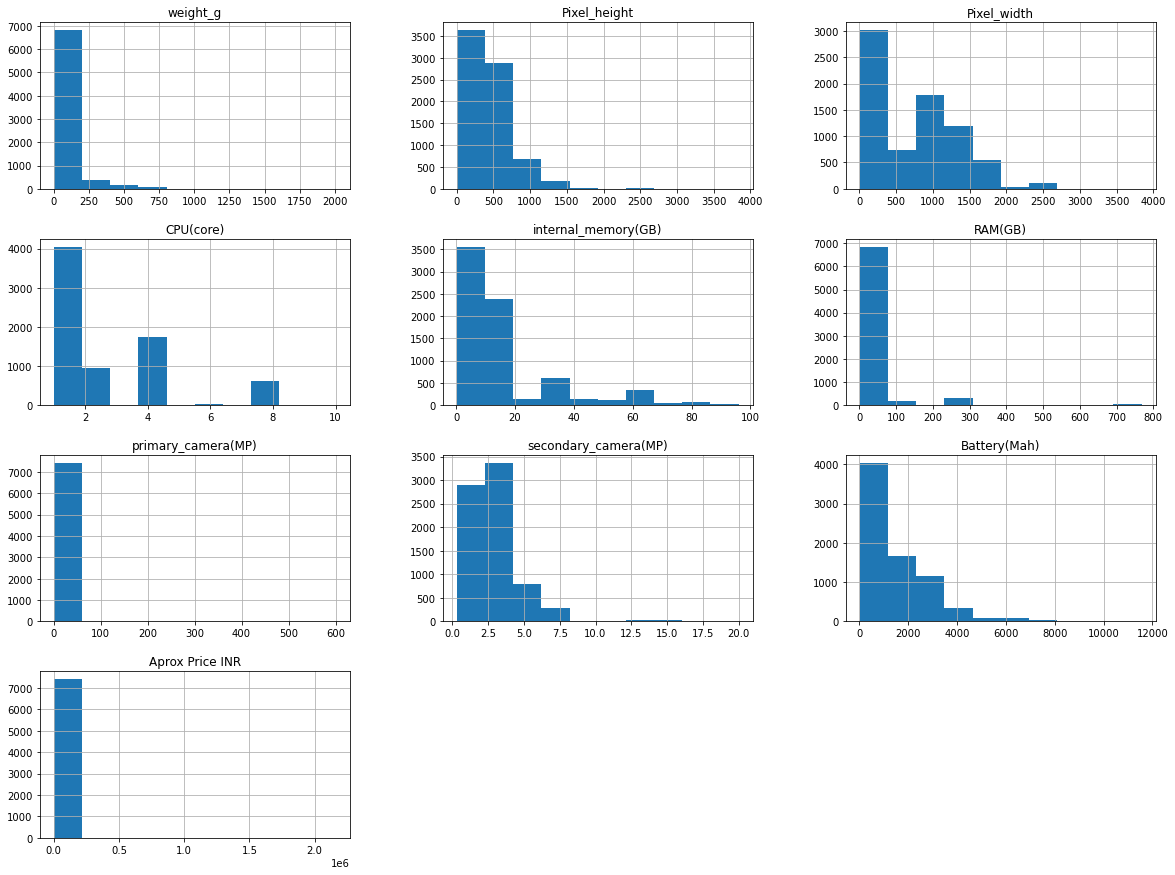

In [19]:
data.hist(bins=10,figsize=(20,15))

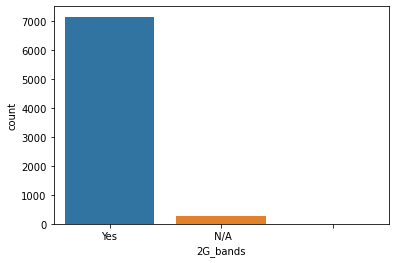

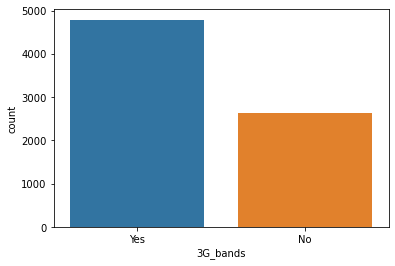

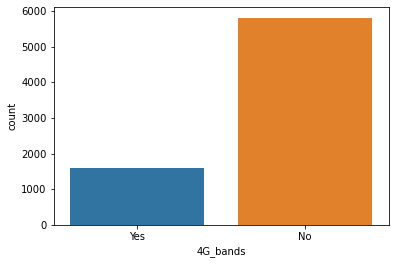

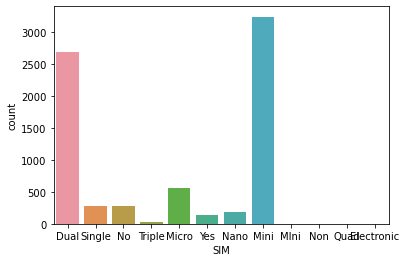

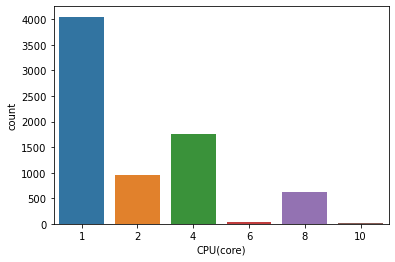

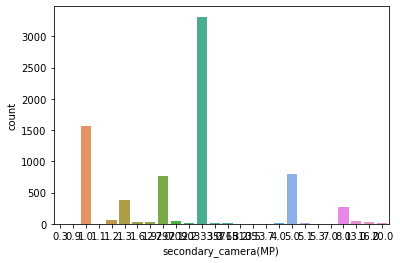

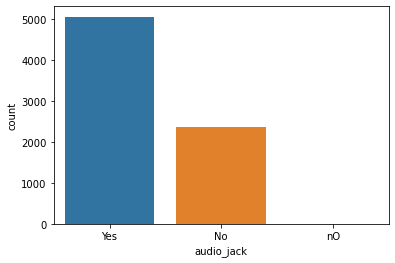

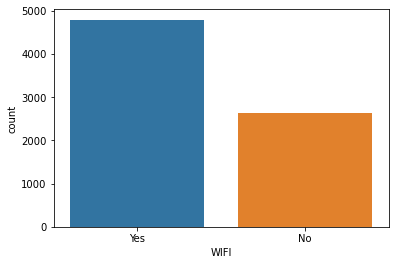

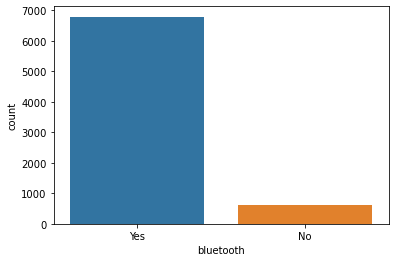

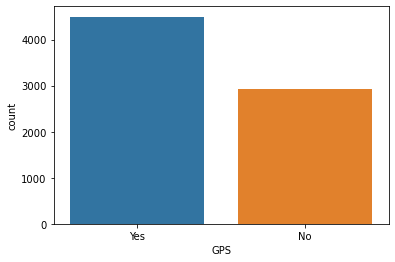

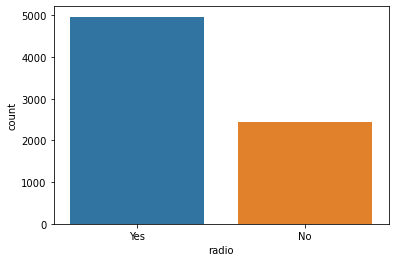

In [20]:
for i in data:
    if(data[i].nunique()<30):
        sns.countplot(x=data[i])
        plt.show()

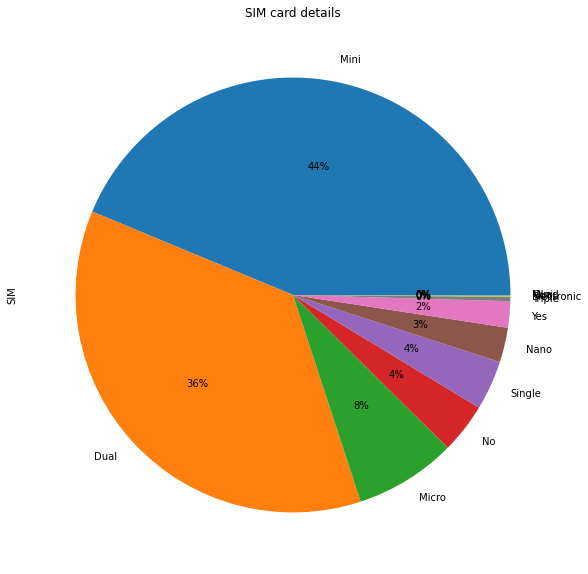

In [21]:
data["SIM"].value_counts().plot(kind='pie', title='SIM card details',figsize=(15,10),autopct='%.0f%%')
plt.show()

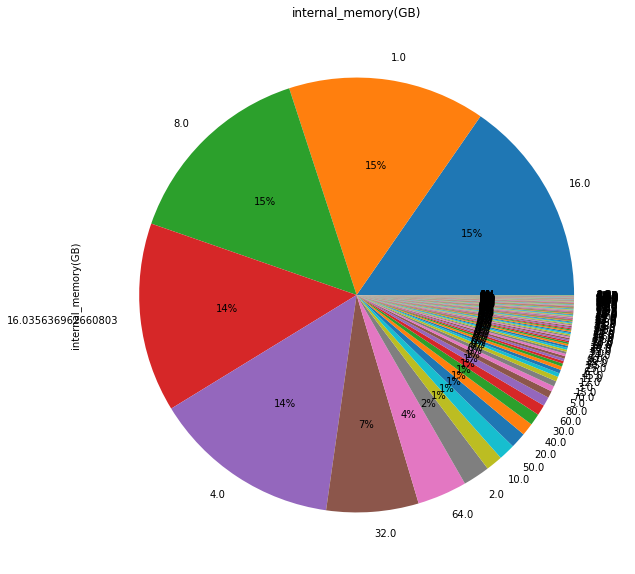

In [22]:
data["internal_memory(GB)"].value_counts().plot(kind='pie', title='internal_memory(GB)',figsize=(15,10),autopct='%.0f%%')
plt.show()

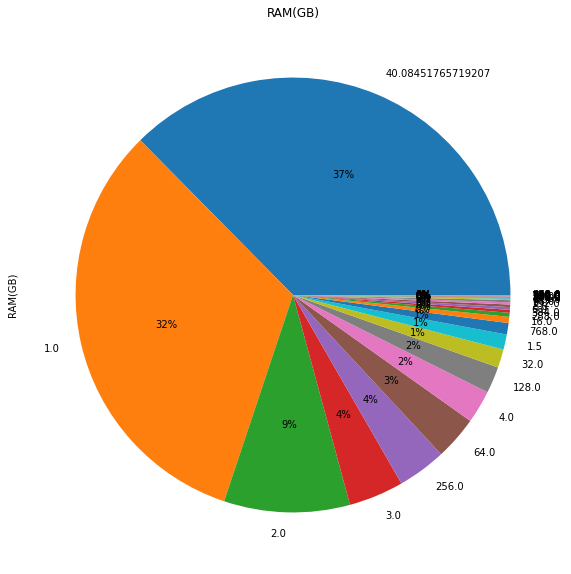

In [23]:
data["RAM(GB)"].value_counts().plot(kind='pie', title='RAM(GB)',figsize=(15,10),autopct='%.0f%%')
plt.show()

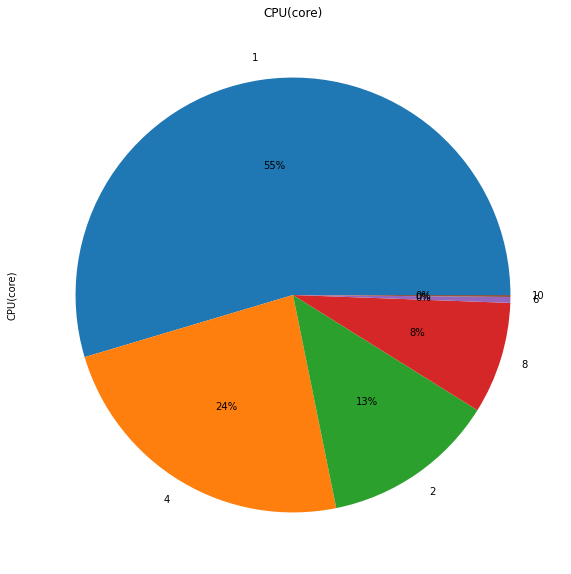

In [24]:
data["CPU(core)"].value_counts().plot(kind='pie', title='CPU(core)',figsize=(15,10),autopct='%.0f%%')
plt.show()

<AxesSubplot:xlabel='CPU(core)', ylabel='brand'>

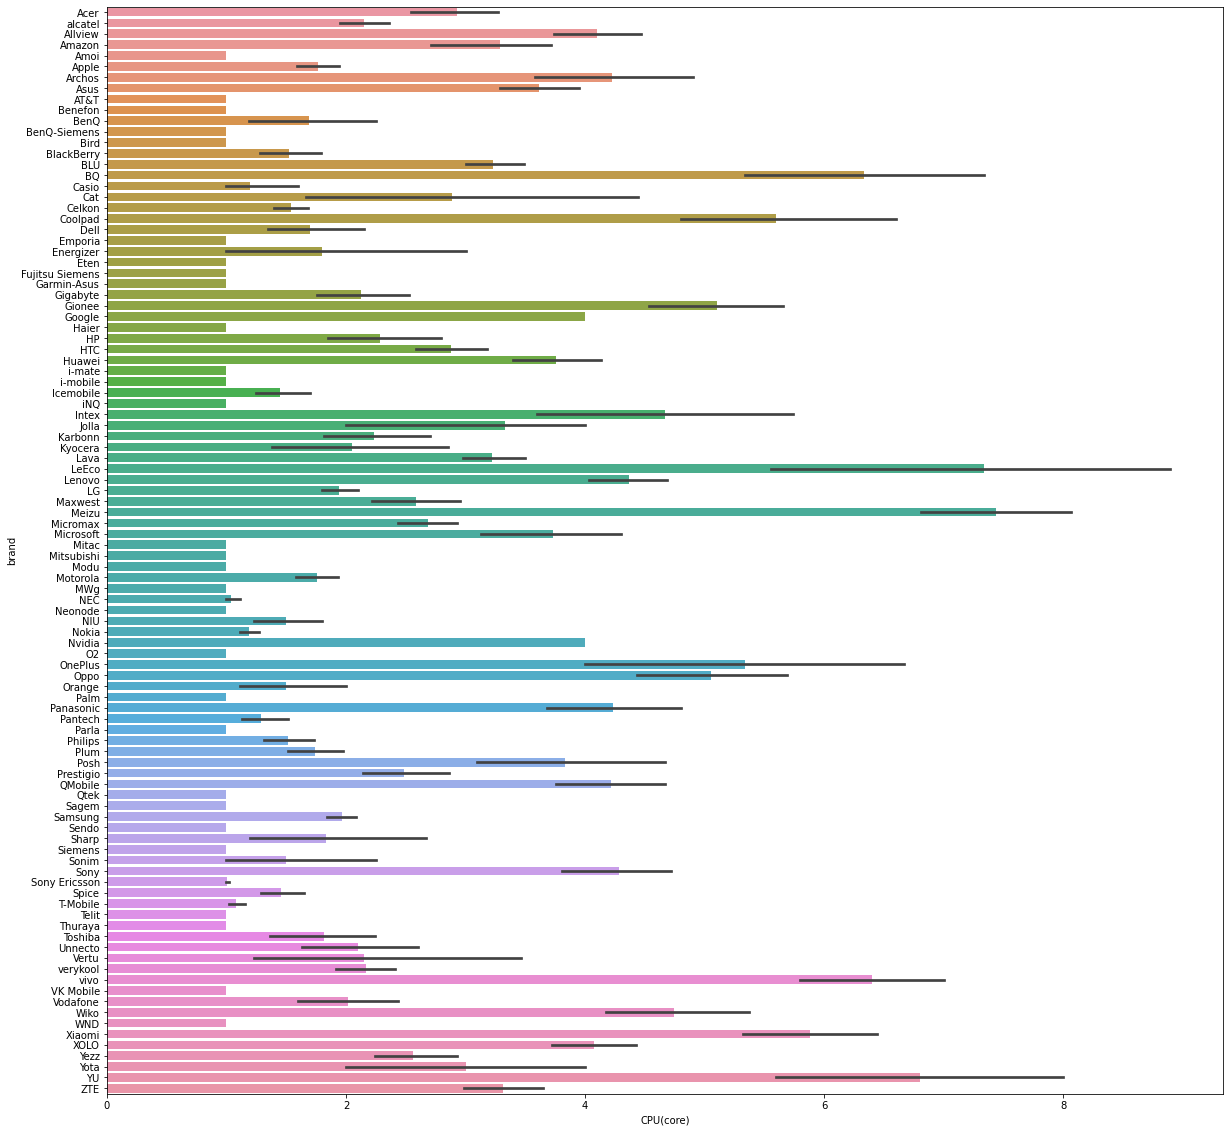

In [25]:
plt.figure(figsize=(20,20))
sns.barplot(x="CPU(core)", y="brand", data=data)

<AxesSubplot:xlabel='Aprox Price INR', ylabel='OS'>

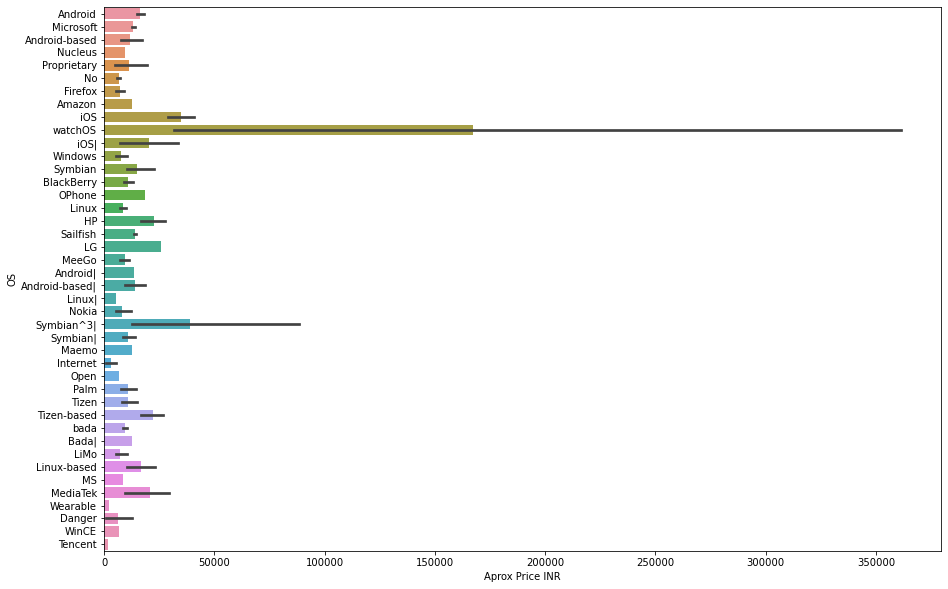

In [26]:
plt.figure(figsize=(15,10))
sns.barplot(y="OS", x="Aprox Price INR", data=data)

<AxesSubplot:xlabel='Aprox Price INR', ylabel='SIM'>

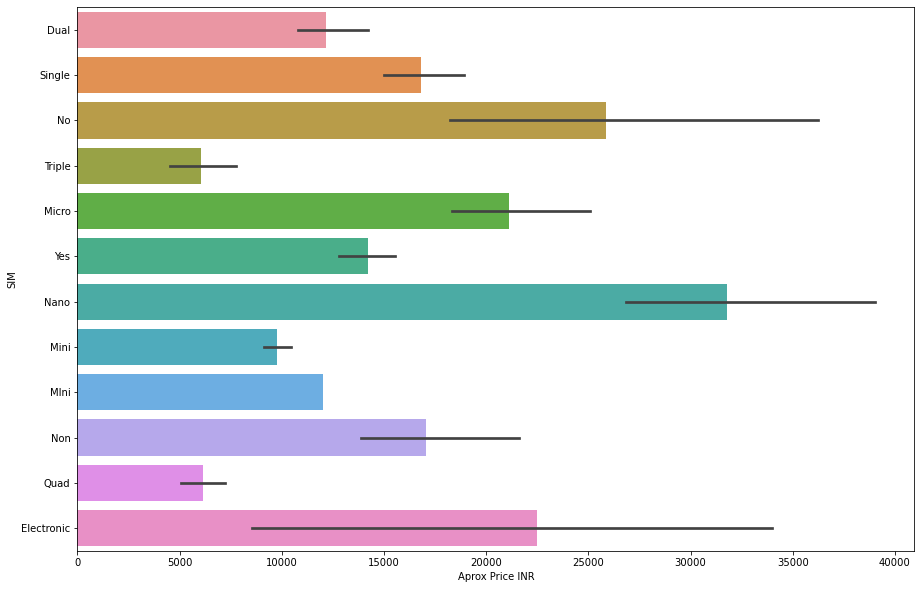

In [27]:
plt.figure(figsize=(15,10))
sns.barplot(y="SIM", x="Aprox Price INR", data=data)

<AxesSubplot:xlabel='secondary_camera(MP)', ylabel='Aprox Price INR'>

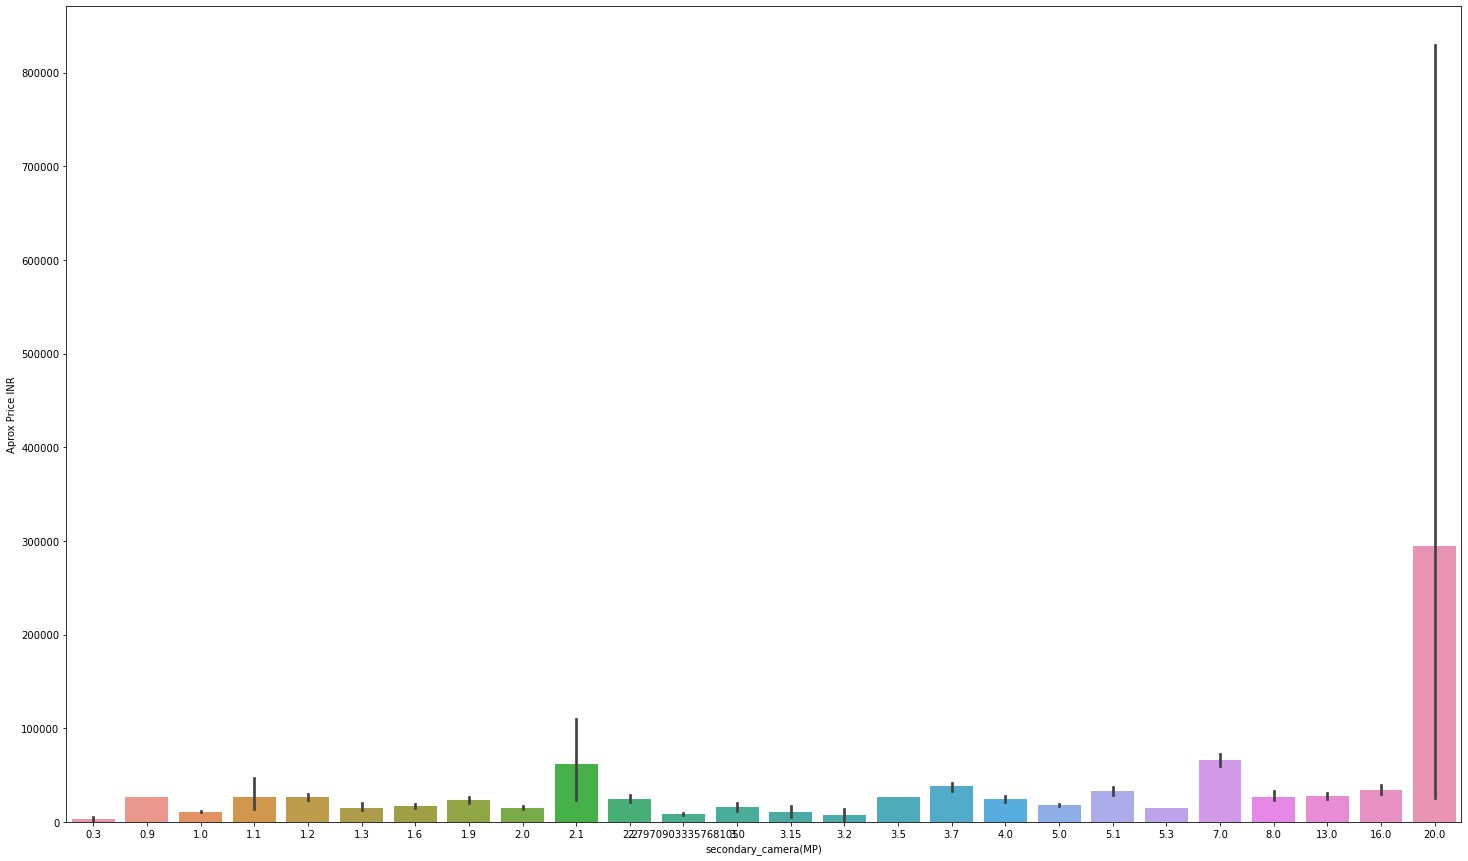

In [28]:
plt.figure(figsize=(25,15))
sns.barplot(x="secondary_camera(MP)", y="Aprox Price INR", data=data)

C:\Users\91799\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


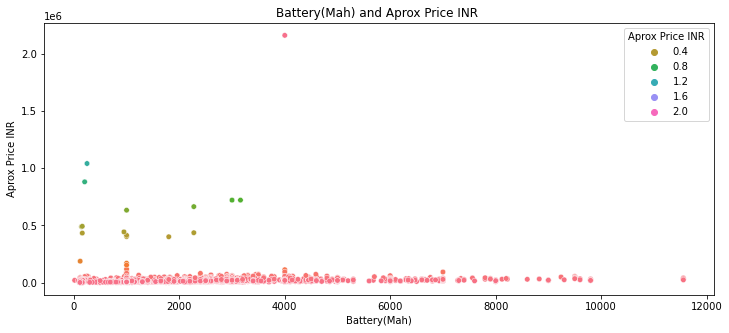

In [29]:
plt.figure(figsize=(12,5))
plt.title("Battery(Mah) and Aprox Price INR ")
sns.scatterplot(data["Battery(Mah)"],y=data["Aprox Price INR"],hue=data["Aprox Price INR"],s=30,palette="husl")
plt.show()

C:\Users\91799\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


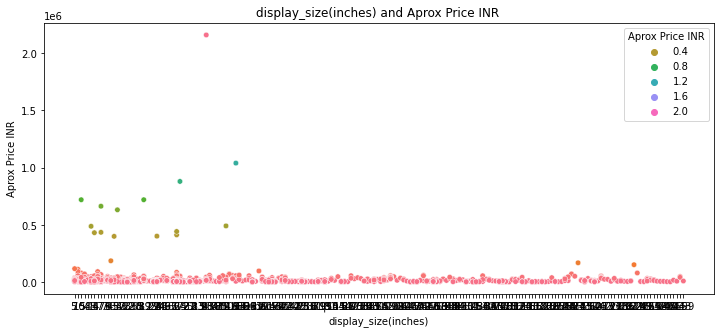

In [30]:
plt.figure(figsize=(12,5))
plt.title("display_size(inches) and Aprox Price INR ")
sns.scatterplot(data["display_size(inches)"],y=data["Aprox Price INR"],hue=data["Aprox Price INR"],s=30,palette="husl")
plt.show()

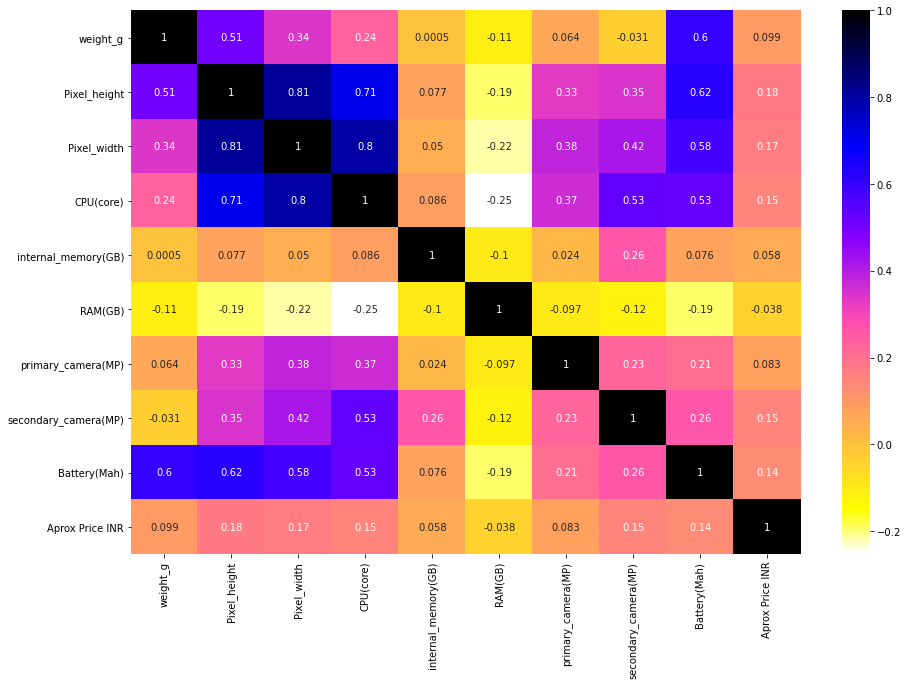

In [31]:
plt.figure(figsize= (15,10))
sns.heatmap(data.corr(), annot = True, cmap="gnuplot2_r")
plt.show()

In [32]:
data.dtypes

brand                    object
model                    object
2G_bands                 object
3G_bands                 object
4G_bands                 object
weight_g                float64
SIM                      object
display_size(inches)     object
Pixel_height            float64
Pixel_width               int64
OS                       object
CPU(core)                 int64
internal_memory(GB)     float64
RAM(GB)                 float64
primary_camera(MP)      float64
secondary_camera(MP)    float64
audio_jack               object
WIFI                     object
bluetooth                object
GPS                      object
radio                    object
Battery(Mah)              int64
Aprox Price INR           int64
dtype: object

In [33]:
data['CPU(core)'].value_counts()

1     4051
4     1749
2      959
8      616
6       32
10      11
Name: CPU(core), dtype: int64

In [34]:
data['brand'].value_counts()

Samsung            972
LG                 508
Nokia              395
Motorola           311
alcatel            289
                  ... 
Benefon              2
Fujitsu Siemens      2
Yota                 2
Thuraya              1
Mitsubishi           1
Name: brand, Length: 100, dtype: int64

In [35]:
data['model'].value_counts()

A10                        5
M600                       4
X500                       4
Hero                       4
Flash                      4
                          ..
Yoga Tab 3 Plus            1
Transformer Pad TF303CL    1
GU200                      1
E215                       1
OT-S521A                   1
Name: model, Length: 7202, dtype: int64

In [36]:
data['2G_bands'].value_counts()

Yes     7137
 N/A     269
          12
Name: 2G_bands, dtype: int64

In [37]:
data['3G_bands'].value_counts()

Yes    4786
No     2632
Name: 3G_bands, dtype: int64

In [38]:
data['4G_bands'].value_counts()

No     5813
Yes    1605
Name: 4G_bands, dtype: int64

In [39]:
data['SIM'].value_counts()

Mini          3244
Dual          2693
Micro          562
No             276
Single         273
Nano           191
Yes            145
Triple          24
Electronic       4
Non              3
Quad             2
MIni             1
Name: SIM, dtype: int64

In [40]:
data['display_size(inches)'].value_counts()

5       898
4       472
5.5     441
2       438
2.4     428
       ... 
3.46      1
1.92      1
6.2       1
CSTN      1
7.86      1
Name: display_size(inches), Length: 186, dtype: int64

In [41]:
data['OS'].value_counts()

Android           3945
No                2551
Microsoft          477
Symbian            135
BlackBerry          81
iOS                 35
Linux               23
Symbian|            21
Firefox             15
watchOS             14
Tizen-based         12
Android-based       12
bada                10
HP                   8
Nokia                8
Palm                 8
Windows              8
Tizen                7
Symbian^3|           7
Proprietary          4
LiMo                 3
Danger               3
MediaTek             3
Sailfish             3
MeeGo                3
Linux-based          2
Internet             2
Android-based|       2
iOS|                 2
Open                 2
LG                   1
WinCE                1
OPhone               1
Maemo                1
Nucleus              1
Linux|               1
Tencent              1
Amazon               1
MS                   1
Android|             1
Wearable             1
Bada|                1
Name: OS, dtype: int64

In [42]:
data['audio_jack'].value_counts()

Yes    5054
No     2363
nO        1
Name: audio_jack, dtype: int64

In [43]:
data['WIFI'].value_counts()

Yes    4788
No     2630
Name: WIFI, dtype: int64

In [44]:
data['bluetooth'].value_counts()

Yes    6792
No      626
Name: bluetooth, dtype: int64

In [45]:
data['GPS'].value_counts()

Yes    4496
No     2922
Name: GPS, dtype: int64

In [46]:
data['radio'].value_counts()

Yes    4970
No     2448
Name: radio, dtype: int64

In [47]:
from sklearn.preprocessing import LabelEncoder
data['radio'] = LabelEncoder().fit_transform(data['radio'])
data['radio'].value_counts()

<ipython-input-47-07f27ca375a5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['radio'] = LabelEncoder().fit_transform(data['radio'])


1    4970
0    2448
Name: radio, dtype: int64

In [48]:
from sklearn.preprocessing import LabelEncoder
data['GPS'] = LabelEncoder().fit_transform(data['GPS'])
data['GPS'].value_counts()

<ipython-input-48-b345dd8b740c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['GPS'] = LabelEncoder().fit_transform(data['GPS'])


1    4496
0    2922
Name: GPS, dtype: int64

In [49]:
from sklearn.preprocessing import LabelEncoder
data['bluetooth'] = LabelEncoder().fit_transform(data['bluetooth'])
data['bluetooth'].value_counts()

<ipython-input-49-6371bcb5d3f8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['bluetooth'] = LabelEncoder().fit_transform(data['bluetooth'])


1    6792
0     626
Name: bluetooth, dtype: int64

In [50]:
from sklearn.preprocessing import LabelEncoder
data['WIFI'] = LabelEncoder().fit_transform(data['WIFI'])
data['WIFI'].value_counts()

<ipython-input-50-a71635484b37>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['WIFI'] = LabelEncoder().fit_transform(data['WIFI'])


1    4788
0    2630
Name: WIFI, dtype: int64

In [51]:
from sklearn.preprocessing import LabelEncoder
data['2G_bands'] = LabelEncoder().fit_transform(data['2G_bands'])
data['2G_bands'].value_counts()

<ipython-input-51-cce1710ec01e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['2G_bands'] = LabelEncoder().fit_transform(data['2G_bands'])


2    7137
1     269
0      12
Name: 2G_bands, dtype: int64

In [52]:
from sklearn.preprocessing import LabelEncoder
data['3G_bands'] = LabelEncoder().fit_transform(data['3G_bands'])
data['3G_bands'].value_counts()

<ipython-input-52-e7ce9bf46d24>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['3G_bands'] = LabelEncoder().fit_transform(data['3G_bands'])


1    4786
0    2632
Name: 3G_bands, dtype: int64

In [53]:
from sklearn.preprocessing import LabelEncoder
data['4G_bands'] = LabelEncoder().fit_transform(data['4G_bands'])
data['4G_bands'].value_counts()

<ipython-input-53-72bac98379d3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['4G_bands'] = LabelEncoder().fit_transform(data['4G_bands'])


0    5813
1    1605
Name: 4G_bands, dtype: int64

In [54]:
from sklearn.preprocessing import LabelEncoder
data['audio_jack'] = LabelEncoder().fit_transform(data['audio_jack'])
data['audio_jack'].value_counts()

<ipython-input-54-24d151fb7a34>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['audio_jack'] = LabelEncoder().fit_transform(data['audio_jack'])


1    5054
0    2363
2       1
Name: audio_jack, dtype: int64

In [55]:
from sklearn.preprocessing import LabelEncoder
data['display_size(inches)'] = LabelEncoder().fit_transform(data['display_size(inches)'])
data['display_size(inches)'].value_counts()

<ipython-input-55-9cfc61aceff6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['display_size(inches)'] = LabelEncoder().fit_transform(data['display_size(inches)'])


137    898
113    472
149    441
58     438
71     428
      ... 
38       1
14       1
2        1
165      1
183      1
Name: display_size(inches), Length: 186, dtype: int64

In [56]:
from sklearn.preprocessing import LabelEncoder
data['OS'] = LabelEncoder().fit_transform(data['OS'])
data['OS'].value_counts()

<ipython-input-56-ace0eb6ec4a7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['OS'] = LabelEncoder().fit_transform(data['OS'])


1     3945
21    2551
20     477
29     135
6       81
39      35
13      23
31      21
8       15
41      14
2       12
34      12
38      10
22       8
9        8
37       8
26       8
33       7
30       7
27       4
18       3
12       3
19       3
28       3
7        3
3        2
40       2
14       2
10       2
25       2
36       1
16       1
4        1
24       1
11       1
15       1
17       1
23       1
32       1
5        1
35       1
0        1
Name: OS, dtype: int64

In [57]:
from sklearn.preprocessing import LabelEncoder
data['SIM'] = LabelEncoder().fit_transform(data['SIM'])
data['SIM'].value_counts()

<ipython-input-57-b13cbf8355ce>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['SIM'] = LabelEncoder().fit_transform(data['SIM'])


4     3244
0     2693
3      562
6      276
9      273
5      191
11     145
10      24
1        4
7        3
8        2
2        1
Name: SIM, dtype: int64

In [58]:
from sklearn.preprocessing import LabelEncoder
data['model'] = LabelEncoder().fit_transform(data['model'])
data['model'].value_counts()

<ipython-input-58-2a852945bf50>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['model'] = LabelEncoder().fit_transform(data['model'])


435     5
3667    4
2165    4
6424    4
2873    4
       ..
3379    1
1330    1
5424    1
3371    1
2047    1
Name: model, Length: 7202, dtype: int64

In [59]:
from sklearn.preprocessing import LabelEncoder
data['brand'] = LabelEncoder().fit_transform(data['brand'])
data['brand'].value_counts()

<ipython-input-59-952ca6935e0e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['brand'] = LabelEncoder().fit_transform(data['brand'])


70    972
37    508
53    395
49    311
94    289
     ... 
23      2
92      2
12      2
47      1
80      1
Name: brand, Length: 100, dtype: int64

In [60]:
data.dtypes

brand                     int32
model                     int32
2G_bands                  int32
3G_bands                  int32
4G_bands                  int32
weight_g                float64
SIM                       int32
display_size(inches)      int32
Pixel_height            float64
Pixel_width               int64
OS                        int32
CPU(core)                 int64
internal_memory(GB)     float64
RAM(GB)                 float64
primary_camera(MP)      float64
secondary_camera(MP)    float64
audio_jack                int32
WIFI                      int32
bluetooth                 int32
GPS                       int32
radio                     int32
Battery(Mah)              int64
Aprox Price INR           int64
dtype: object

C:\Users\91799\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\91799\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\91799\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

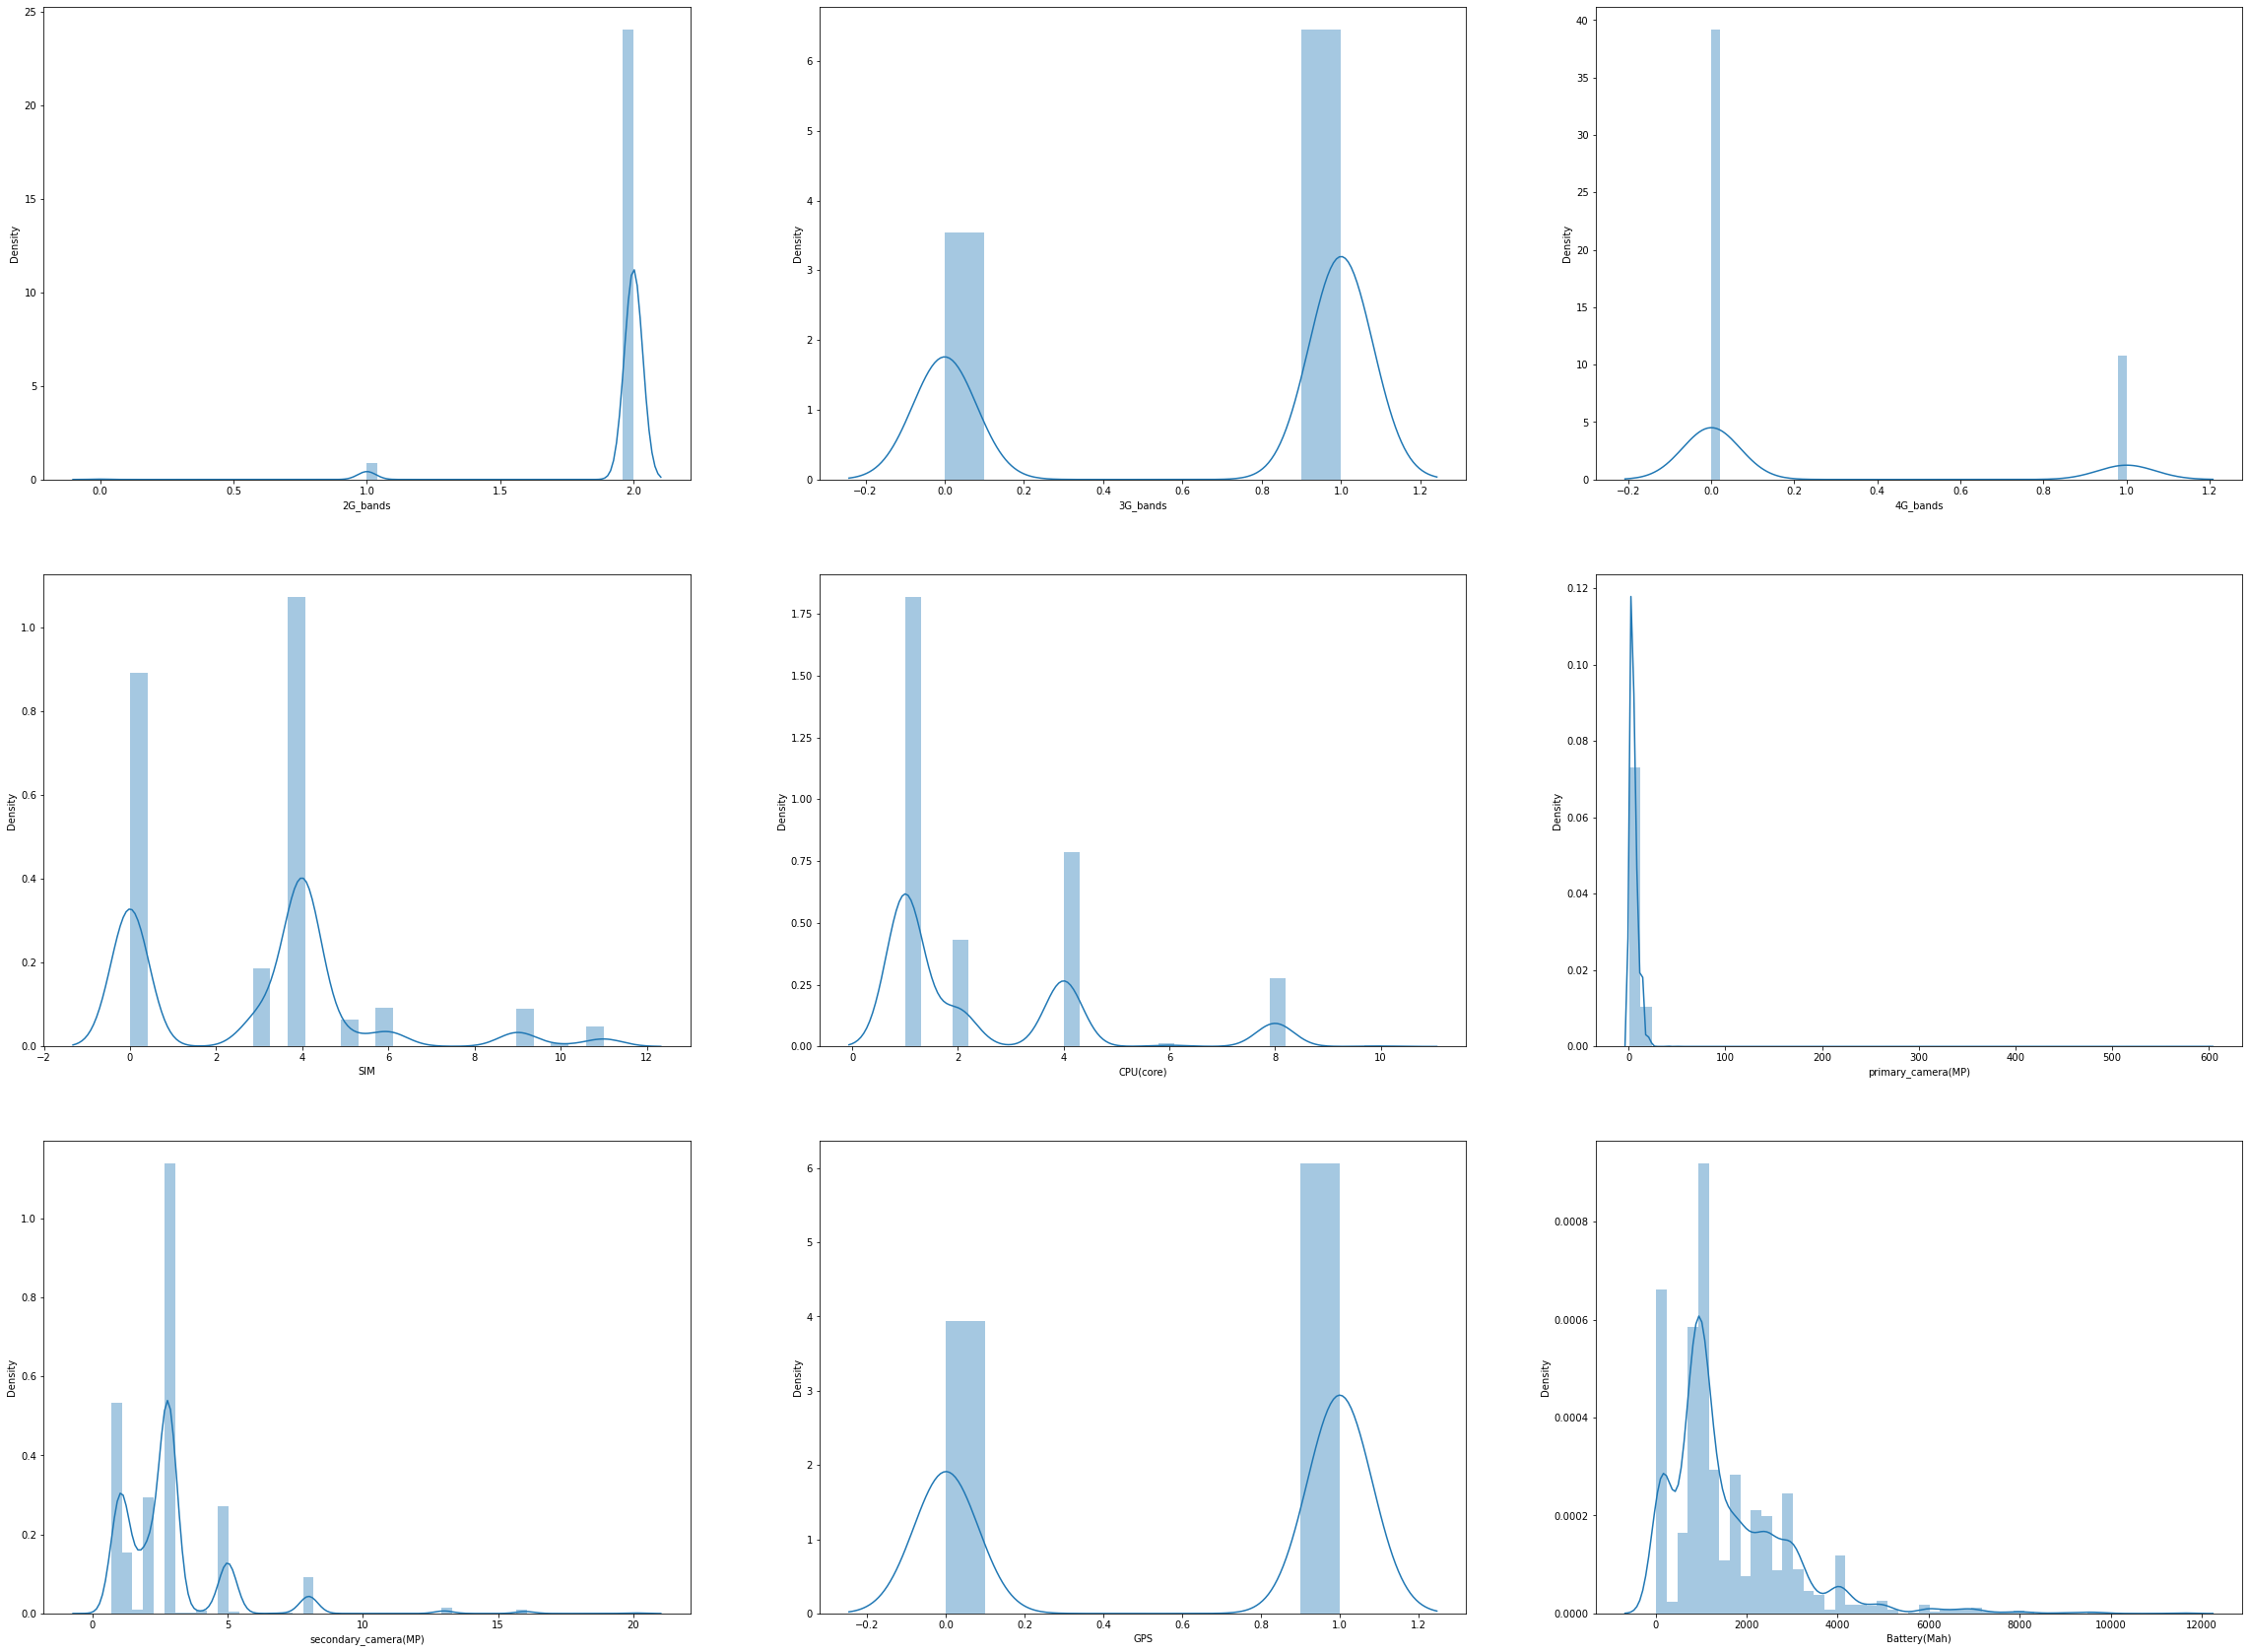

In [61]:
plt.figure(figsize = (40,30))
plt.subplot(331)
sns.distplot(data['2G_bands'])
plt.subplot(332)
sns.distplot(data['3G_bands'])
plt.subplot(333)
sns.distplot(data['4G_bands'])
plt.subplot(334)
sns.distplot(data['SIM'])
plt.subplot(335)
sns.distplot(data['CPU(core)'])
plt.subplot(336)
sns.distplot(data['primary_camera(MP)'])
plt.subplot(337)
sns.distplot(data['secondary_camera(MP)'])
plt.subplot(338)
sns.distplot(data['GPS'])
plt.subplot(339)
sns.distplot(data['Battery(Mah)'])
plt.show()

In [62]:
pip install plotly.express

Note: you may need to restart the kernel to use updated packages.


In [63]:
import plotly.express as px

In [64]:
px.histogram(data_frame=data, x="CPU(core)", color="Aprox Price INR", title="Comparison according to price range of number of cores per device")

In [66]:
data1 = data.loc[:,['brand','model','3G_bands','SIM','display_size(inches)','OS','CPU(core)','internal_memory(GB)','RAM(GB)','primary_camera(MP)','secondary_camera(MP)','audio_jack','WIFI','bluetooth','GPS','radio','Battery(Mah)','Aprox Price INR']]
data1

brand  model  3G_bands  SIM  display_size(inches)  OS  CPU(core)  \
0         1   3007         1    0                   168   1          4   
1         1   3478         1    9                   149   1          8   
2         1   3477         1    9                   137   1          4   
3         1   2985         0    6                    47   1          4   
4         1   3462         1   10                   149   1          8   
...     ...    ...       ...  ...                   ...  ..        ...   
8626     93   2113         1    4                    71  21          1   
8627     93   2082         1    4                    58  21          1   
8628     93   2081         1    4                    58  21          1   
8629     93   2080         1    4                    58  21          1   
8630     93   1541         0    4                     1  21          1   

      internal_memory(GB)    RAM(GB)  primary_camera(MP)  \
0               16.000000   2.000000           13.000000   
1               32.000000   3.000000           13.000000   
2                8.000000   1.000000            8.000000   
3               16.000000   2.000000            5.000000   
4               32.000000   3.000000           13.000000   
...                   ...        ...                 ...   
8626            16.035637  40.084518            3.150000   
8627            16.035637  40.084518            2.000000   
8628            16.035637  40.084518            2.000000   
8629            16.035637  40.084518            2.000000   
8630             4.000000  40.084518            5.387743   

      secondary_camera(MP)  audio_jack  WIFI  bluetooth  GPS  radio  \
0                  2.00000           1     1          1    1      1   
1                  5.00000           1     1          1    1      1   
2                  2.00000           1     1          1    1      1   
3                  2.00000           1     1          1    0      0   
4                 13.00000           1     1          1    1      1   
...                    ...         ...   ...        ...  ...    ...   
8626               1.00000           0     0          1    0      1   
8627               1.00000           0     0          1    0      1   
8628               1.00000           0     0          1    0      1   
8629               1.00000           0     0          1    0      1   
8630               2.79709           0     0          0    0      0   

      Battery(Mah)  Aprox Price INR  
0             3400            13600  
1             4080            20000  
2              145             9600  
3             1000            18400  
4             4020            18400  
...            ...              ...  
8626           800             4266  
8627          1000             5333  
8628          1000             5333  
8629          1000             5333  
8630           690             3680  

[7418 rows x 18 columns]

In [67]:
data2=data.loc[:,['2G_bands','weight_g','Pixel_height','Pixel_width']]

In [68]:
data2

2G_bands  weight_g  Pixel_height  Pixel_width
0            2     260.0         720.0         1280
1            2     169.0        1080.0         1920
2            2     190.0         720.0         1280
3            1     110.0        1920.0          120
4            2     166.0         720.0         1280
...        ...       ...           ...          ...
8626         2      90.0         240.0          320
8627         2      90.0         176.0          220
8628         2      90.0         176.0          220
8629         2      90.0         176.0          220
8630         2      85.0         128.0          128

[7418 rows x 4 columns]

#### Merging dataset

In [69]:
data3=pd.concat([data1,data2],axis=1)

In [70]:
data3

brand  model  3G_bands  SIM  display_size(inches)  OS  CPU(core)  \
0         1   3007         1    0                   168   1          4   
1         1   3478         1    9                   149   1          8   
2         1   3477         1    9                   137   1          4   
3         1   2985         0    6                    47   1          4   
4         1   3462         1   10                   149   1          8   
...     ...    ...       ...  ...                   ...  ..        ...   
8626     93   2113         1    4                    71  21          1   
8627     93   2082         1    4                    58  21          1   
8628     93   2081         1    4                    58  21          1   
8629     93   2080         1    4                    58  21          1   
8630     93   1541         0    4                     1  21          1   

      internal_memory(GB)    RAM(GB)  primary_camera(MP)  ...  WIFI  \
0               16.000000   2.000000           13.000000  ...     1   
1               32.000000   3.000000           13.000000  ...     1   
2                8.000000   1.000000            8.000000  ...     1   
3               16.000000   2.000000            5.000000  ...     1   
4               32.000000   3.000000           13.000000  ...     1   
...                   ...        ...                 ...  ...   ...   
8626            16.035637  40.084518            3.150000  ...     0   
8627            16.035637  40.084518            2.000000  ...     0   
8628            16.035637  40.084518            2.000000  ...     0   
8629            16.035637  40.084518            2.000000  ...     0   
8630             4.000000  40.084518            5.387743  ...     0   

      bluetooth  GPS  radio  Battery(Mah)  Aprox Price INR  2G_bands  \
0             1    1      1          3400            13600         2   
1             1    1      1          4080            20000         2   
2             1    1      1           145             9600         2   
3             1    0      0          1000            18400         1   
4             1    1      1          4020            18400         2   
...         ...  ...    ...           ...              ...       ...   
8626          1    0      1           800             4266         2   
8627          1    0      1          1000             5333         2   
8628          1    0      1          1000             5333         2   
8629          1    0      1          1000             5333         2   
8630          0    0      0           690             3680         2   

      weight_g  Pixel_height  Pixel_width  
0        260.0         720.0         1280  
1        169.0        1080.0         1920  
2        190.0         720.0         1280  
3        110.0        1920.0          120  
4        166.0         720.0         1280  
...        ...           ...          ...  
8626      90.0         240.0          320  
8627      90.0         176.0          220  
8628      90.0         176.0          220  
8629      90.0         176.0          220  
8630      85.0         128.0          128  

[7418 rows x 22 columns]

### Ranking dataset according to price range

In [71]:
rdata=data
rdata['rank_by_price']=rdata['Aprox Price INR'].rank()
rdata1=rdata
rdata1.head()

<ipython-input-71-3461001c0c76>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



brand  model  2G_bands  3G_bands  4G_bands  weight_g  SIM  \
0      1   3007         2         1         1     260.0    0   
1      1   3478         2         1         1     169.0    9   
2      1   3477         2         1         1     190.0    9   
3      1   2985         1         0         0     110.0    6   
4      1   3462         2         1         1     166.0   10   

   display_size(inches)  Pixel_height  Pixel_width  ...  primary_camera(MP)  \
0                   168         720.0         1280  ...                13.0   
1                   149        1080.0         1920  ...                13.0   
2                   137         720.0         1280  ...                 8.0   
3                    47        1920.0          120  ...                 5.0   
4                   149         720.0         1280  ...                13.0   

   secondary_camera(MP)  audio_jack  WIFI  bluetooth  GPS  radio  \
0                   2.0           1     1          1    1      1   
1                   5.0           1     1          1    1      1   
2                   2.0           1     1          1    1      1   
3                   2.0           1     1          1    0      0   
4                  13.0           1     1          1    1      1   

   Battery(Mah)  Aprox Price INR  rank_by_price  
0          3400            13600         5261.5  
1          4080            20000         6338.0  
2           145             9600         3994.5  
3          1000            18400         6149.5  
4          4020            18400         6149.5  

[5 rows x 24 columns]

#### Sorting above dataset according to price range

In [72]:
rdata1.sort_values(by=['rank_by_price'])

brand  model  2G_bands  3G_bands  4G_bands  weight_g  SIM  \
2784     38   3065         2         0         0     100.0    0   
7589     77   3883         2         1         0     156.0    0   
4463     41   5914         2         0         0     120.0    4   
3637     42    758         2         0         0     105.0    0   
1664     21   2017         2         0         0     122.0    0   
...     ...    ...       ...       ...       ...       ...  ...   
8403     90   6756         2         1         1     152.0    0   
7847     84   5369         2         1         1     225.0    3   
660       5   6236         1         0         0      55.0    6   
659       5   6237         1         0         0      69.0    6   
1798     26    432         2         1         1     110.0    0   

      display_size(inches)  Pixel_height  Pixel_width  ...  \
2784                   113         480.0          800  ...   
7589                   185         480.0          854  ...   
4463                    76         240.0          320  ...   
3637                   101         320.0          480  ...   
1664                    58         240.0          320  ...   
...                    ...           ...          ...  ...   
8403                   137        1080.0         1920  ...   
7847                   142        1080.0         1920  ...   
660                     21         340.0          272  ...   
659                     27         390.0          312  ...   
1798                   144         720.0         1280  ...   

      primary_camera(MP)  secondary_camera(MP)  audio_jack  WIFI  bluetooth  \
2784            3.150000               1.00000           1     1          1   
7589            3.150000               1.30000           1     1          1   
4463            2.000000               2.79709           0     1          1   
3637            2.000000               2.79709           1     1          1   
1664            1.300000               2.79709           1     0          1   
...                  ...                   ...         ...   ...        ...   
8403           13.000000               8.00000           1     1          1   
7847           21.000000               2.10000           1     1          1   
660             5.387743               2.79709           0     1          1   
659             5.387743               2.79709           0     1          1   
1798           13.000000              20.00000           1     1          1   

      GPS  radio  Battery(Mah)  Aprox Price INR  rank_by_price  
2784    0      1           115              613           17.0  
7589    1      1           115              613           17.0  
4463    0      0           115              613           17.0  
3637    1      1           115              613           17.0  
1664    0      1           115              613           17.0  
...   ...    ...           ...              ...            ...  
8403    1      1          3000           720000         7414.5  
7847    1      0          3160           720000         7414.5  
660     0      0           205           880000         7416.0  
659     0      0           250          1040000         7417.0  
1798    1      1          4000          2160000         7418.0  

[7418 rows x 24 columns]

#### Ranking on all the features using rank()

In [73]:
rdata2=data
RankedDataset1=rdata2.rank()
RankedDataset1.sort_values(by='Aprox Price INR')

brand   model  2G_bands  3G_bands  4G_bands  weight_g     SIM  \
2784  2653.5  3179.0    3850.0    1316.5    2907.0    1761.5  1347.0   
7589  6132.0  4017.0    3850.0    5025.5    2907.0    5834.0  1347.0   
4463  2884.0  6093.0    3850.0    1316.5    2907.0    3788.5  4882.5   
3637  2907.0   815.0    3850.0    1316.5    2907.0    2047.0  1347.0   
1664  1218.0  2109.0    3850.0    1316.5    2907.0    3937.0  1347.0   
...      ...     ...       ...       ...       ...       ...     ...   
8403  6581.5  6963.0    3850.0    5025.5    6616.0    5644.5  1347.0   
7847  6327.0  5537.0    3850.0    5025.5    6616.0    6868.0  2979.5   
660    299.0  6421.0     147.0    1316.5    2907.0      58.0  6833.5   
659    299.0  6422.0     147.0    1316.5    2907.0     210.5  6833.5   
1798  1346.0   447.0    3850.0    5025.5    6616.0    2778.0  1347.0   

      display_size(inches)  Pixel_height  Pixel_width  ...  \
2784                4238.5        4302.0       4174.0  ...   
7589                7409.0        4302.0       4822.0  ...   
4463                2594.0        2206.5       2384.0  ...   
3637                3695.5        3225.5       3447.0  ...   
1664                1415.5        2206.5       2384.0  ...   
...                    ...           ...          ...  ...   
8403                5718.5        6939.5       6999.0  ...   
7847                6247.5        6939.5       6999.0  ...   
660                  200.5        3553.0       1767.5  ...   
659                  365.5        3633.0       1778.0  ...   
1798                6317.0        5928.5       6129.0  ...   

      primary_camera(MP)  secondary_camera(MP)  audio_jack    WIFI  bluetooth  \
2784              2926.5                 783.5      4890.5  5024.5     4022.5   
7589              2926.5                1819.0      4890.5  5024.5     4022.5   
4463              1972.0                4550.0      1182.0  5024.5     4022.5   
3637              1972.0                4550.0      4890.5  5024.5     4022.5   
1664              1101.5                4550.0      4890.5  1315.5     4022.5   
...                  ...                   ...         ...     ...        ...   
8403              6845.5                7203.5      4890.5  5024.5     4022.5   
7847              7379.5                2859.5      4890.5  5024.5     4022.5   
660               5041.5                4550.0      1182.0  5024.5     4022.5   
659               5041.5                4550.0      1182.0  5024.5     4022.5   
1798              6845.5                7414.5      4890.5  5024.5     4022.5   

         GPS   radio  Battery(Mah)  Aprox Price INR  rank_by_price  
2784  1461.5  4933.5          40.5             17.0           17.0  
7589  5170.5  4933.5          40.5             17.0           17.0  
4463  1461.5  1224.5          40.5             17.0           17.0  
3637  5170.5  4933.5          40.5             17.0           17.0  
1664  1461.5  4933.5          40.5             17.0           17.0  
...      ...     ...           ...              ...            ...  
8403  5170.5  4933.5        6474.0           7414.5         7414.5  
7847  5170.5  1224.5        6710.5           7414.5         7414.5  
660   1461.5  1224.5        1127.5           7416.0         7416.0  
659   1461.5  1224.5        1135.5           7417.0         7417.0  
1798  5170.5  4933.5        6987.0           7418.0         7418.0  

[7418 rows x 24 columns]

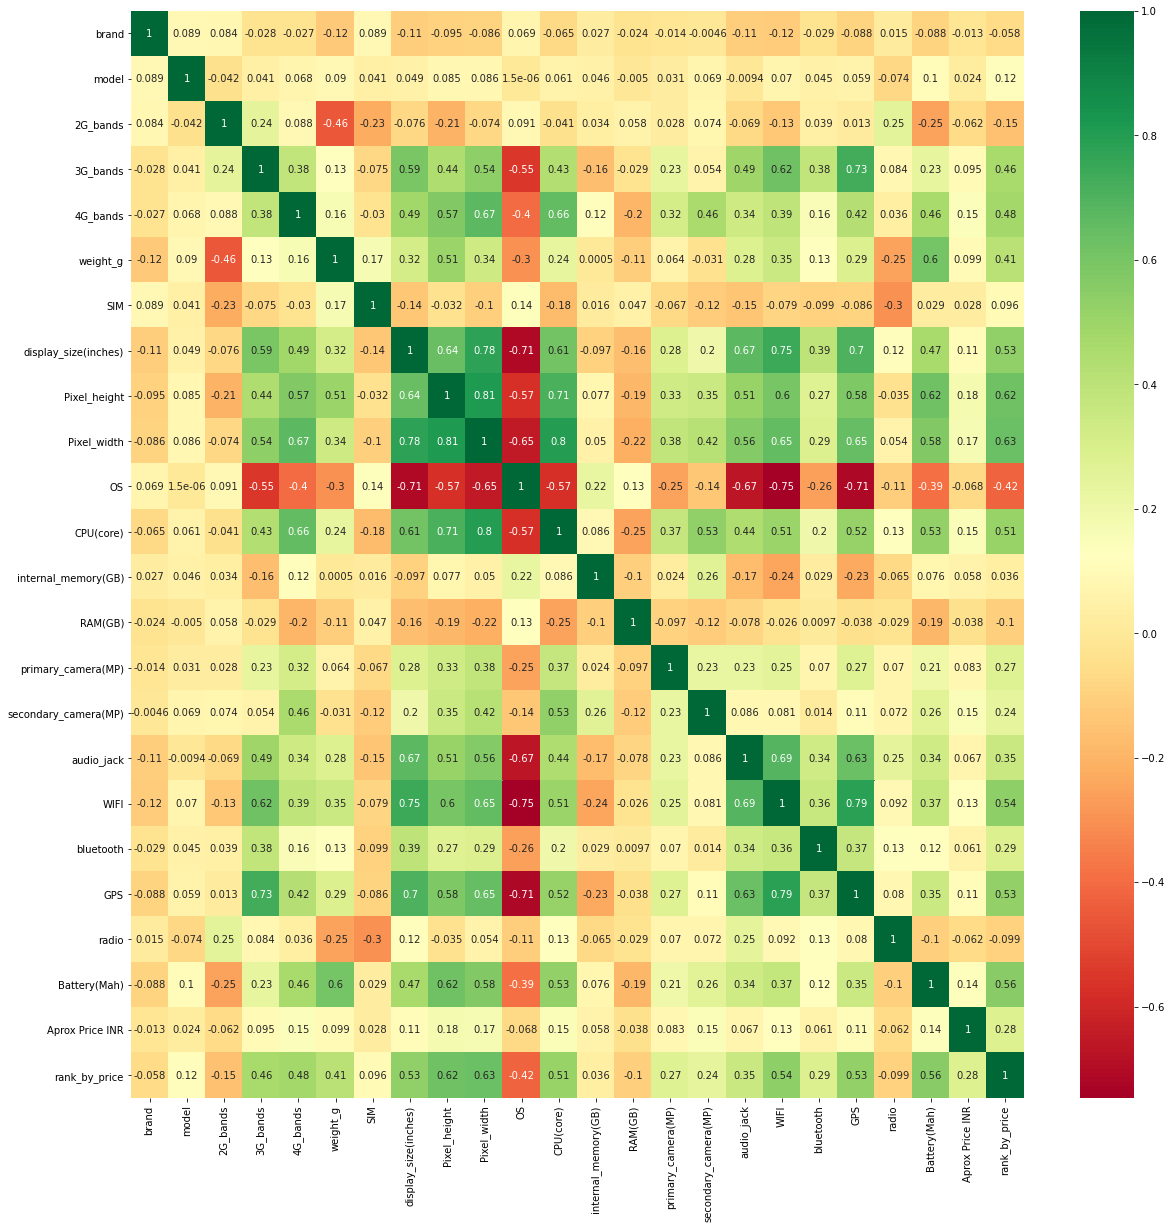

In [74]:
X =data.iloc[:,0:20]  
y =data.iloc[:,-1]    
corrmat =data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

#### Data Splitting and applying models

In [75]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

data=data.iloc[:,:21]

X=data.iloc[:,:-1]
y=data.iloc[:,-1]

sc = StandardScaler()
X=sc.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

### Logistic Regression

In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
log=LogisticRegression(max_iter=5000)
log.fit(X_train,y_train)
pred_log=log.predict(X_test)
print(pred_log)
acrr=accuracy_score(y_test,pred_log)*100
print("Accuracy Score {}%".format(acrr))
print("Confusion matrix {}".format(confusion_matrix(y_test,pred_log)))
print("{}".format(classification_report(y_test,pred_log)))

[1 1 1 ... 1 1 1]
Accuracy Score 75.68733153638814%
Confusion matrix [[ 294  307]
 [ 144 1110]]
              precision    recall  f1-score   support

           0       0.67      0.49      0.57       601
           1       0.78      0.89      0.83      1254

    accuracy                           0.76      1855
   macro avg       0.73      0.69      0.70      1855
weighted avg       0.75      0.76      0.75      1855



### Naive Bayes

In [77]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(X_train,y_train)
nb_pred=nb.predict(X_test)
ac_nb=accuracy_score(y_test,nb_pred)*100
print("Accuracy is {}".format(ac_nb))
print('confusion matrix=\n',confusion_matrix(y_test,nb_pred))
print('{}'.format(classification_report(y_test,nb_pred)))

Accuracy is 72.2911051212938
confusion matrix=
 [[ 256  345]
 [ 169 1085]]
              precision    recall  f1-score   support

           0       0.60      0.43      0.50       601
           1       0.76      0.87      0.81      1254

    accuracy                           0.72      1855
   macro avg       0.68      0.65      0.65      1855
weighted avg       0.71      0.72      0.71      1855



### SVM

In [78]:
from sklearn.svm import SVC
SVC=SVC(kernel='rbf')
SVC.fit(X_train,y_train)
SVC_pred=SVC.predict(X_test)

ac_svm=accuracy_score(y_test,SVC_pred)*100
print("Accuracy is {}".format(ac_svm))
print('confusion matrix=\n',confusion_matrix(y_test,SVC_pred))
print('{}'.format(classification_report(y_test,SVC_pred)))

Accuracy is 79.94609164420486
confusion matrix=
 [[ 370  231]
 [ 141 1113]]
              precision    recall  f1-score   support

           0       0.72      0.62      0.67       601
           1       0.83      0.89      0.86      1254

    accuracy                           0.80      1855
   macro avg       0.78      0.75      0.76      1855
weighted avg       0.79      0.80      0.79      1855



### Desision Tree

In [79]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(criterion='entropy')
dt.fit(X_train,y_train)
dt_pred=dt.predict(X_test)
ac_dt=accuracy_score(y_test,dt_pred)*100
print("Accuracy is {}".format(ac_dt))
print('confusion matrix=\n',confusion_matrix(y_test,dt_pred))
print('{}'.format(classification_report(y_test,dt_pred)))

Accuracy is 83.2345013477089
confusion matrix=
 [[ 448  153]
 [ 158 1096]]
              precision    recall  f1-score   support

           0       0.74      0.75      0.74       601
           1       0.88      0.87      0.88      1254

    accuracy                           0.83      1855
   macro avg       0.81      0.81      0.81      1855
weighted avg       0.83      0.83      0.83      1855



### Random Forest

In [80]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=300)
rf.fit(X_train,y_train)
rf_pred=rf.predict(X_test)
ac_rf=accuracy_score(y_test,rf_pred)*100
print("Accuracy is {}".format(ac_rf))
print('confusion matrix=\n',confusion_matrix(y_test,rf_pred))
print('{}'.format(classification_report(y_test,rf_pred)))

Accuracy is 85.49865229110513
confusion matrix=
 [[ 436  165]
 [ 104 1150]]
              precision    recall  f1-score   support

           0       0.81      0.73      0.76       601
           1       0.87      0.92      0.90      1254

    accuracy                           0.85      1855
   macro avg       0.84      0.82      0.83      1855
weighted avg       0.85      0.85      0.85      1855



### Majority Voting Classifier

In [81]:
from sklearn.ensemble import VotingClassifier
mvc = VotingClassifier(estimators = [('GaussianNB', nb),('DecisionTreeClassifier',dt),('Random Forest', rf), ('svm',SVC),('LogisticRegression',log)], voting = 'hard')
mvc.fit(X_train, y_train)
y_pred_mvc = mvc.predict(X_test)

In [82]:
ac_mvc=accuracy_score(y_test,y_pred_mvc)*100
print("Accuracy is {}".format(ac_mvc))
print('confusion matrix=\n',confusion_matrix(y_test,y_pred_mvc))
print('{}'.format(classification_report(y_test,y_pred_mvc)))

Accuracy is 82.15633423180593
confusion matrix=
 [[ 371  230]
 [ 101 1153]]
              precision    recall  f1-score   support

           0       0.79      0.62      0.69       601
           1       0.83      0.92      0.87      1254

    accuracy                           0.82      1855
   macro avg       0.81      0.77      0.78      1855
weighted avg       0.82      0.82      0.82      1855



### Accuracy Bar Chart

In [83]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

classifiers = ["Logistic Regression", 'GaussianNB','DecisionTreeClassifier','Random Forest','svm','VotingClassifier']
Acc_list = [acrr,ac_nb,ac_dt,ac_rf,ac_svm,ac_mvc]
df_models = pd.DataFrame({"Model":classifiers, "Accuracy":Acc_list})
px.histogram(data_frame=df_models, x="Model", y="Accuracy", color=["red","yellow","blue","orange","green","rose"])

Here the best accuracy value 85.98 and the best model is Random forest